<a href="https://colab.research.google.com/github/EPreethamBavan/PRAM/blob/main/Data_Privacy_Package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import logging

class Pram:
    @staticmethod
    def __get_transition_matrix__(values):
        print("\n\nCalculating Transition Matrix\n")
        counts = pd.Series(values).value_counts(sort=False)
        print("Value Counts:")
        print(counts)
        v = counts.values
        matrix_values = v * v[:, None]
        matrix = pd.DataFrame(matrix_values, index=counts.index, columns=counts.index)
        print("Raw Transition Matrix:")
        print(matrix)

        matrix = matrix.divide(matrix.sum(axis=1), axis=0)
        print("Normalized Transition Matrix:")
        print(matrix)

        return matrix

    @staticmethod
    def __get_weighted_transition_matrix__(values, m, alpha):
        print("\n\nCalculating Weighted Transition Matrix\n")
        tm = Pram.__get_transition_matrix__(values)

        diag = np.diag(tm)
        print("Original Diagonal Values:", diag)
        diag = [m if a_ < m else a_ for a_ in diag]
        print("Updated Diagonal Values:", diag)
        np.fill_diagonal(tm.values, diag)
        print("Updated Transition Matrix:")
        print(tm.iloc[:5,:5])

        tm = tm.div(tm.sum(axis=1), axis=0)
        print("Re-normalized Transition Matrix:")
        print(tm.iloc[:10,:10])

        ei = pd.DataFrame(np.identity(len(tm)), index=tm.index, columns=tm.columns)
        print("Identity Matrix:")
        print(ei)

        wm = alpha * tm + (1 - alpha) * ei
        print("Weighted Transition Matrix:")
        print(wm)

        wm = wm.div(wm.sum(axis=1), axis=0)
        print("Final Weighted Transition Matrix:")
        print(wm)

        return wm

    @staticmethod
    def __pram_replace__(tm, current_value):
        print(f"Replacing value: {current_value}")
        if current_value in tm.index:
            new_value = np.random.choice(tm.columns, p=tm.loc[current_value].values)
            print(f"Replaced with: {new_value}")
            return new_value
        print("No replacement found, keeping original.")
        return current_value

    @staticmethod
    def pram(data, m=0.8, alpha=0.5, columns=None, strata=None):
        logger = logging.getLogger('pram')
        print("\n\nApplying PRAM Algorithm\n")

        data = data.copy().astype(str)
        if columns is None:
            columns = list(data.columns)

        if strata and strata in columns:
            logger.warning(f"Strata column '{strata}' removed from modification columns.")
            print(f"Strata column '{strata}' removed from modification columns.")
            columns.remove(strata)

        transition_matrices = {}
        strata_levels = data[strata].unique() if strata else ['all']
        print("Strata Levels:", strata_levels)

        for level in strata_levels:
            for column in columns:
                print(f"Processing column: {column}, Strata: {level}")
                values = data[data[strata] == level][column].values if strata else data[column].values
                transition_matrices[(level, column)] = Pram.__get_weighted_transition_matrix__(values, m, alpha)

        for index, row in data.iterrows():
            for column in columns:
                strata_value = row[strata] if strata else 'all'
                data.at[index, column] = Pram.__pram_replace__(transition_matrices[(strata_value, column)], row[column])

        print("Final PRAM Processed Data:")
        print(data)

        return data

def pram1(data, m=0.8, alpha=0.5, columns=None, strata=None):
    return Pram.pram(data, m=m, alpha=alpha, columns=columns, strata=strata)


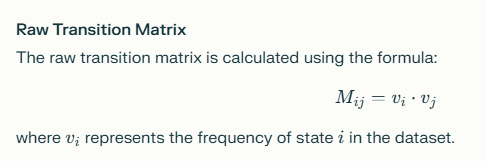

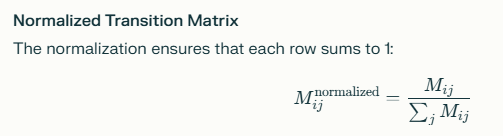

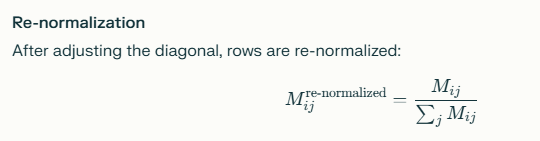

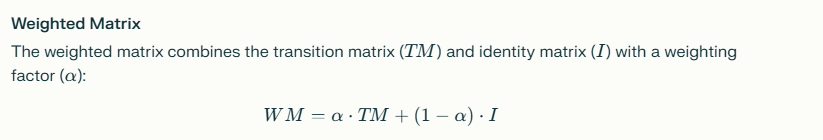

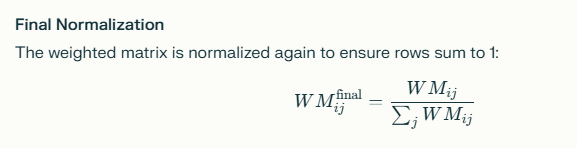

Screenshot 2025-03-21 144732.png

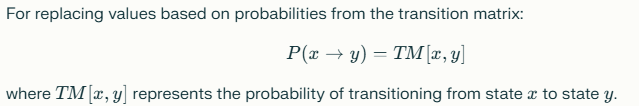

In [ ]:
import pandas as pd
import numpy as np
import logging
from tabulate import tabulate

class Pram:
    @staticmethod
    def __format_matrix__(matrix, title="Matrix"):
        print(f"\n{title}:\n")
        print(tabulate(matrix, headers='keys', tablefmt='fancy_grid'))

    @staticmethod
    def __get_transition_matrix__(values):
        print("\n\n▶ Calculating Transition Matrix\n")
        counts = pd.Series(values).value_counts(sort=False)
        Pram.__format_matrix__(counts.to_frame().T, "Value Counts")

        v = counts.values
        matrix_values = v * v[:, None]
        matrix = pd.DataFrame(matrix_values, index=counts.index, columns=counts.index)
        Pram.__format_matrix__(matrix, "Raw Transition Matrix")

        matrix = matrix.divide(matrix.sum(axis=1), axis=0)
        Pram.__format_matrix__(matrix, "Normalized Transition Matrix")

        return matrix

    @staticmethod
    def __get_weighted_transition_matrix__(values, m, alpha):
        print("\n\n▶ Calculating Weighted Transition Matrix\n")
        tm = Pram.__get_transition_matrix__(values)

        diag = np.diag(tm)
        Pram.__format_matrix__(pd.DataFrame(diag, columns=["Original Diagonal Values"]), "Original Diagonal Values")

        diag = [m if a_ < m else a_ for a_ in diag]
        Pram.__format_matrix__(pd.DataFrame(diag, columns=["Updated Diagonal Values"]), "Updated Diagonal Values")

        np.fill_diagonal(tm.values, diag)
        Pram.__format_matrix__(tm.iloc[:5, :5], "Updated Transition Matrix (Preview)")

        tm = tm.div(tm.sum(axis=1), axis=0)
        Pram.__format_matrix__(tm.iloc[:10, :10], "Re-normalized Transition Matrix (Preview)")

        ei = pd.DataFrame(np.identity(len(tm)), index=tm.index, columns=tm.columns)
        Pram.__format_matrix__(ei, "Identity Matrix")

        wm = alpha * tm + (1 - alpha) * ei
        Pram.__format_matrix__(wm, "Weighted Transition Matrix")

        wm = wm.div(wm.sum(axis=1), axis=0)
        Pram.__format_matrix__(wm, "Final Weighted Transition Matrix")

        return wm

    @staticmethod
    def __pram_replace__(tm, current_value):
        print(f"\nReplacing value: {current_value}")
        if current_value in tm.index:
            new_value = np.random.choice(tm.columns, p=tm.loc[current_value].values)
            print(f"Replaced with: {new_value}\n")
            return new_value
        print("No replacement found, keeping original.\n")
        return current_value

    @staticmethod
    def pram1(data, m=0.8, alpha=0.5, columns=None, strata=None):
        logger = logging.getLogger('pram')
        print("\n\n▶ Applying PRAM Algorithm\n")

        data = data.copy().astype(str)
        if columns is None:
            columns = list(data.columns)

        if strata and strata in columns:
            logger.warning(f"Strata column '{strata}' removed from modification columns.")
            print(f"⚠ Strata column '{strata}' removed from modification columns.")
            columns.remove(strata)

        transition_matrices = {}
        strata_levels = data[strata].unique() if strata else ['all']
        print("Strata Levels:", strata_levels)

        for level in strata_levels:
            for column in columns:
                print(f"▶ Processing column: {column}, Strata: {level}")
                values = data[data[strata] == level][column].values if strata else data[column].values
                transition_matrices[(level, column)] = Pram.__get_weighted_transition_matrix__(values, m, alpha)

        for index, row in data.iterrows():
            for column in columns:
                strata_value = row[strata] if strata else 'all'
                data.at[index, column] = Pram.__pram_replace__(transition_matrices[(strata_value, column)], row[column])

        print("\nFinal PRAM Processed Data:")
        print(tabulate(data.head(10), headers='keys', tablefmt='fancy_grid'))

        return data

def pram1(data, m=0.8, alpha=0.5, columns=None, strata=None):
    return Pram.pram(data, m=m, alpha=alpha, columns=columns, strata=strata)

In [ ]:
import pandas as pd
persons = [
{'gender': 'female', 'region': 'rural', 'education': 'higher', 'age': 27},
{'gender': 'female', 'region': 'rural', 'education': 'lower', 'age': 35},
{'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 26},
{'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 22},
{'gender': 'female', 'region': 'urban', 'education': 'higher', 'age': 41},
{'gender': 'female', 'region': 'urban', 'education': 'lower', 'age': 54},
{'gender': 'female', 'region': 'rural', 'education': 'higher', 'age': 38},
{'gender': 'female', 'region': 'rural', 'education': 'lower', 'age': 44},
{'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 18},
{'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 52},
{'gender': 'female', 'region': 'urban', 'education': 'higher', 'age': 44},
{'gender': 'female', 'region': 'urban', 'education': 'lower', 'age': 35},
{'gender': 'female', 'region': 'rural', 'education': 'higher', 'age': 33},
{'gender': 'female', 'region': 'rural', 'education': 'lower', 'age': 31},
{'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 40},
{'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 23},
{'gender': 'female', 'region': 'urban', 'education': 'higher', 'age': 68},
{'gender': 'female', 'region': 'urban', 'education': 'lower', 'age': 19},
{'gender': 'female', 'region': 'rural', 'education': 'higher', 'age': 27},
{'gender': 'female', 'region': 'rural', 'education': 'lower', 'age': 24},
{'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 48},
{'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 38},
{'gender': 'female', 'region': 'urban', 'education': 'higher', 'age': 30},
{'gender': 'female', 'region': 'urban', 'education': 'lower', 'age': 27},
{'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 38},
{'gender': 'female', 'region': 'urban', 'education': 'higher', 'age': 29},
{'gender': 'female', 'region': 'urban', 'education': 'lower', 'age': 27}
]
df = pd.DataFrame(persons)
print(Pram.pram1(df, columns=['age'], strata='gender'))



▶ Applying PRAM Algorithm

Strata Levels: ['female' 'male']
▶ Processing column: age, Strata: female


▶ Calculating Weighted Transition Matrix



▶ Calculating Transition Matrix


Value Counts:

╒═══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│       │   27 │   35 │   41 │   54 │   38 │   44 │   33 │   31 │   68 │   19 │   24 │   30 │   29 │
╞═══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ count │    4 │    2 │    1 │    1 │    1 │    2 │    1 │    1 │    1 │    1 │    1 │    1 │    1 │
╘═══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╛

Raw Transition Matrix:

╒════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│    │   27 │   35 │   41 │   54 │   38 │   44 │   33 │   31 │   68 │   19 │   24 │   30 │   29 │
╞════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪

In [ ]:
import pandas as pd
persons = [
    {'gender': 'female', 'region': 'rural', 'education': 'higher', 'age': 27},
    {'gender': 'female', 'region': 'rural', 'education': 'lower', 'age': 35},
    {'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 26},
    {'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 22},
    {'gender': 'female', 'region': 'urban', 'education': 'higher', 'age': 41},
    {'gender': 'female', 'region': 'urban', 'education': 'lower', 'age': 54},
    {'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 48},
    {'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 38},
    {'gender': 'female', 'region': 'urban', 'education': 'higher', 'age': 30},
    {'gender': 'female', 'region': 'urban', 'education': 'lower', 'age': 27},
    {'gender': 'male', 'region': 'rural', 'education': 'lower', 'age': 38},
    {'gender': 'female', 'region': 'urban', 'education': 'higher', 'age': 29},
    {'gender': 'female', 'region': 'urban', 'education': 'lower', 'age': 27}
]
df = pd.DataFrame(persons)
Pram.pram1(df, columns=['age'], strata='gender')



▶ Applying PRAM Algorithm

Strata Levels: ['female' 'male']
▶ Processing column: age, Strata: female


▶ Calculating Weighted Transition Matrix



▶ Calculating Transition Matrix


Value Counts:

╒═══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│       │   27 │   35 │   41 │   54 │   30 │   29 │
╞═══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ count │    3 │    1 │    1 │    1 │    1 │    1 │
╘═══════╧══════╧══════╧══════╧══════╧══════╧══════╛

Raw Transition Matrix:

╒════╤══════╤══════╤══════╤══════╤══════╤══════╕
│    │   27 │   35 │   41 │   54 │   30 │   29 │
╞════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ 27 │    9 │    3 │    3 │    3 │    3 │    3 │
├────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ 35 │    3 │    1 │    1 │    1 │    1 │    1 │
├────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ 41 │    3 │    1 │    1 │    1 │    1 │    1 │
├────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ 54 │    3 │    1 │    1 │    1 │    1 │    1 │
├────┼──────┼──────┼──────┼

,gender,region,education,age
0,female,rural,higher,27
1,female,rural,lower,27
2,male,rural,lower,26
3,male,rural,lower,26
4,female,urban,higher,27
5,female,urban,lower,54
6,male,rural,lower,48
7,male,rural,lower,48
8,female,urban,higher,30
9,female,urban,lower,27
